In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [3]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
svc = svm.SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [5]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)

In [7]:
svc.fit(X_train,Y_train)
r2_train = np.round(svc.score(X_train, Y_train),3)
r2_test  = np.round(svc.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Train score is :0.566
Test score is :0.538


In [8]:
C = [10.0**i for i in np.arange(-5,5,0.5)]
kernel = ['poly', 'rbf']
#gamma.extend([1,2,3,4,5,6,7,8,9,10])
random_state = 144

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [12]:
svc_grid = svm.SVC(probability=True)
svc_grid.set_params(max_iter = 1e5, random_state = 144)
param_grid = {'C':C, 'kernel':kernel}
svc_grid = GridSearchCV(svc_grid, param_grid, cv = 3, return_train_score=True)
%time svc_grid.fit(X_train_scaled, Y_train)

CPU times: total: 5.05 s
Wall time: 5.05 s


GridSearchCV(cv=3,
             estimator=SVC(max_iter=100000.0, probability=True,
                           random_state=144),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795, 10.0, 31.622776601683793,
                               100.0, 316.22776601683796, 1000.0,
                               3162.2776601683795, 10000.0,
                               31622.776601683792],
                         'kernel': ['poly', 'rbf']},
             return_train_score=True)

In [13]:
svc_df = pd.DataFrame(svc_grid.cv_results_)
svc_df.shape

(40, 18)

In [14]:
svc_df.dropna(axis=0,how='any',inplace=True)
svc_df.shape

(40, 18)

In [15]:
svc_final_df = svc_df.loc[:,['param_C','param_kernel','mean_train_score','mean_test_score']]

In [16]:
svc_final_df.to_csv('SVRCV.csv')

In [17]:
svc_final_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    1.000000
mean_test_score     0.657738
dtype: float64

In [18]:
svc_grid.best_estimator_.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 100000.0,
 'probability': True,
 'random_state': 144,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [21]:
print('Training score is :' + str(np.round(svc_grid.best_estimator_.score(X_train_scaled, Y_train),2)))
print('Testing  score is :' + str(np.round(svc_grid.best_estimator_.score(X_test_scaled, Y_test),2)))

Training score is :0.75
Testing  score is :0.62


In [22]:
svc_grid.best_estimator_.n_support_

array([120, 122,  46,  43,  12])

In [47]:
svc = svm.SVC()
svc.set_params(C = 0.05, kernel = 'poly', max_iter = 1e5, degree = 1, probability = True, random_state = 144, gamma = 0.05)
svc.fit(X_train_scaled,Y_train)
r2_train = np.round(svc.score(X_train_scaled, Y_train),3)
r2_test  = np.round(svc.score(X_test_scaled, Y_test),3)
print(svc.n_support_)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

[144 140  46  43  12]
Train score is :0.641
Test score is :0.639


****************************************************************************************************


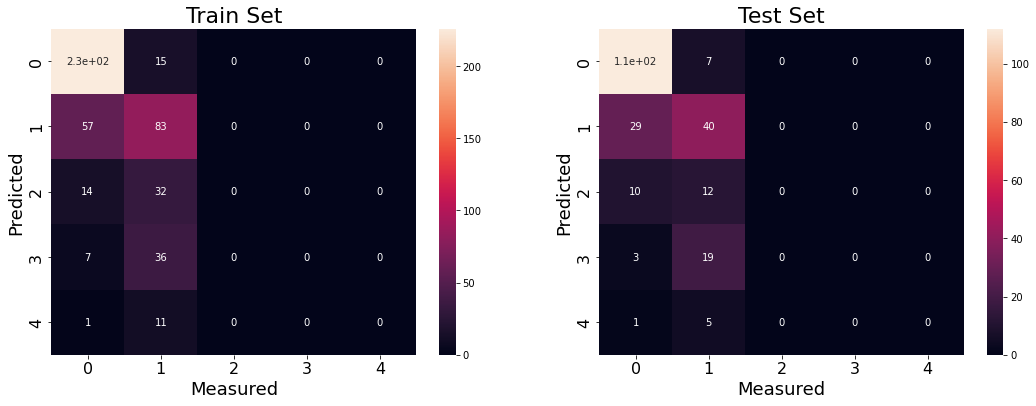

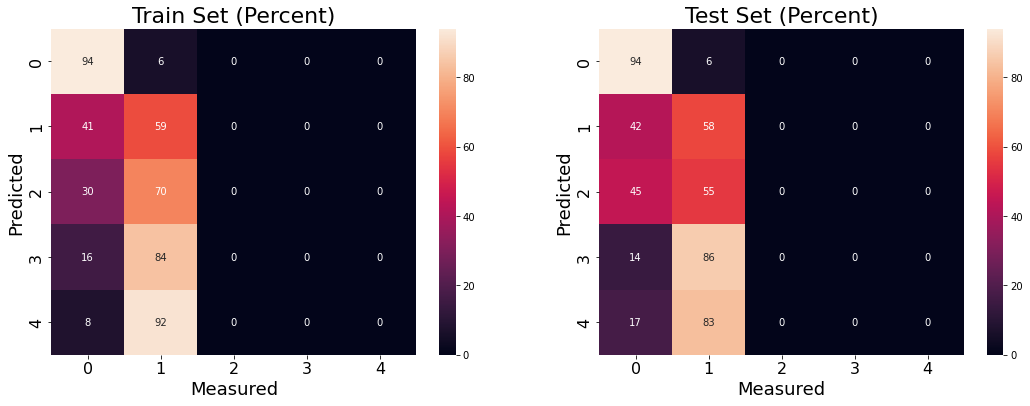

In [48]:
conf_data_train = confusion_matrix(Y_train,svc.predict(X_train_scaled))
conf_data_test  = confusion_matrix(Y_test,svc.predict(X_test_scaled))

fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_data_train, ax = ax[0], annot=True)
sns.heatmap(conf_data_test,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);

conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)
    
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set (Percent)',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set (Percent)',fontsize= 22);